In [226]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [3]:
os.listdir('data')

['date_tenant_reviews.csv',
 'date_tenant_reviews_2.csv',
 'tenant_reviews.csv',
 'tenant_reviews_clean.csv',
 'top10_neighbourhood.csv',
 'visits_contracts.csv',
 'visits_offers_contracts.csv']

In [68]:
date_tenant_reviews = pd.read_csv('data/date_tenant_reviews.csv')
date_tenant_reviews_2 = pd.read_csv('data/date_tenant_reviews_2.csv')
tenant_reviews = pd.read_csv('data/tenant_reviews.csv')
tenant_reviews_clean = pd.read_csv('data/tenant_reviews_clean.csv')
top10_neighbourhood = pd.read_csv('data/top10_neighbourhood.csv')
visits_contracts = pd.read_csv('data/visits_contracts.csv')
visits_offers_contracts = pd.read_csv('data/visits_offers_contracts.csv')

# data

## review de inquilinos - a principio utilizar tenant_reviews_clean

In [69]:
#df_review = date_tenant_reviews.append(date_tenant_reviews_2)

In [70]:
#df_review.drop_duplicates()

In [71]:
tenant_reviews_clean

,visit_date,day,time,house_id,neighbourhood,visitor,agent,review,building,conservation,size,price,location,did_not_like_the_location,expected_a_better_preserved_property,bigger_in_photos,different_from_the_listing,others
0,2018-08-25,2018-08-25,9:30,892816340,Bela Vista,Gustavo,Irineu,5,False,True,True,True,True,False,False,False,False,NaN
1,2018-05-02,2018-05-02,16:30,892828253,Paraíso,Erica,Marcelo,5,False,True,True,True,True,False,False,False,False,NaN
2,2018-08-08,2018-08-08,8:30,892836919,Vila Mazzei,Julio,Carlos,5,True,True,True,False,True,False,False,False,False,NaN
3,2018-05-19,2018-05-19,12:15,892789680,Saúde,Carla,Mario,3,False,False,False,False,False,False,True,False,False,NaN
4,2018-01-16,2018-01-16,14:45,892816141,Moema,Thâmara,Antonio,3,False,False,False,False,False,False,True,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12756,2018-03-27,2018-03-27,8:00,892790664,Perdizes,Markus,Cindy,NaN,False,False,False,False,False,False,False,False,False,NaN
12757,2018-06-28,2018-06-28,13:00,892791091,Liberdade,Hudson,Ricardo,NaN,False,False,False,False,False,False,False,False,False,NaN
12758,2018-01-03,2018-01-03,15:00,892815463,Bela Vista,Lívia,Gisele,NaN,False,False,False,False,False,False,False,False,False,NaN
12759,2018-01-27,2018-01-27,9:45,892810874,Consolação,Gabriela,Marcos,NaN,False,False,False,False,False,False,False,False,False,NaN


## tabela de bairros melhor avaliados

In [72]:
top10_neighbourhood.sort_values('good_reviews', ascending=False)

,neighbourhood,visit_month,visits,houses_visited,good_reviews,bad_reviews
75,Bela Vista,2018-08-01 00:00:00,139,68,235,51
52,Bela Vista,2018-06-01 00:00:00,119,67,196,40
5,Bela Vista,2018-01-01 00:00:00,93,53,166,31
44,Bela Vista,2018-05-01 00:00:00,94,58,164,35
66,Bela Vista,2018-07-01 00:00:00,111,72,154,34
...,...,...,...,...,...,...
38,Copacabana,2018-04-01 00:00:00,12,10,17,3
25,Santa Cecília,2018-03-01 00:00:00,13,10,15,8
28,Jardim Paulista,2018-03-01 00:00:00,25,19,11,10
42,Copacabana,2018-05-01 00:00:00,20,18,9,7


## tabela de visitas e contratos assinados

In [73]:
visits_contracts

,visits,tenants_that_did_not_sign,tenants_that_signed
0,1,5091,148
1,2,2199,124
2,3,1176,108
3,4,510,64
4,5,396,84
5,6,384,64
6,7,261,32
7,8,216,20
8,9,210,12
9,10,132,4


## resumo mensal visita e contratos

In [74]:
visits_offers_contracts

,month,visits,tenant_that_visited,visited_houses,offers,tenants_that_made_offers,contracts
0,jan,7130,4678,4140,3924,2977,724
1,fev,7132,5193,4322,3658,2461,689
2,mar,6933,5322,4299,3791,2526,667
3,abr,7342,5844,3150,2453,1699,603
4,mai,7238,6112,4006,3587,2645,544
5,jun,8377,6710,3250,3011,1583,542
6,jul,8130,7122,3993,3500,1801,443
7,ago,8288,7630,4155,3431,1857,376


# data clean

In [75]:
# slip month and year
def year_split(row):
    return row.split('-')[0]
def month_split(row):
    return row.split('-')[1]

In [76]:
def imput_values_evaluation(row):
    if row == False:
        return 0
    if row == True:
        return 1
    else:
        return np.nan

In [77]:
def other_values(row):
    a = row == row
    if a == False:
        return 0
    if a == True:
        return 1
    else:
        return np.nan()

In [78]:
def review_clean(row):
    try:
        return int(row)
    except:
        return np.nan

## clean tenant_reviews_clean

In [79]:
tenant_reviews_clean['year_visit'] = tenant_reviews_clean['visit_date'].apply(year_split)

In [80]:
tenant_reviews_clean['month_visit'] = tenant_reviews_clean['visit_date'].apply(month_split)

In [81]:
tenant_reviews_clean.head()

,visit_date,day,time,house_id,neighbourhood,visitor,agent,review,building,conservation,size,price,location,did_not_like_the_location,expected_a_better_preserved_property,bigger_in_photos,different_from_the_listing,others,year_visit,month_visit
0,2018-08-25,2018-08-25,9:30,892816340,Bela Vista,Gustavo,Irineu,5,False,True,True,True,True,False,False,False,False,NaN,2018,08
1,2018-05-02,2018-05-02,16:30,892828253,Paraíso,Erica,Marcelo,5,False,True,True,True,True,False,False,False,False,NaN,2018,05
2,2018-08-08,2018-08-08,8:30,892836919,Vila Mazzei,Julio,Carlos,5,True,True,True,False,True,False,False,False,False,NaN,2018,08
3,2018-05-19,2018-05-19,12:15,892789680,Saúde,Carla,Mario,3,False,False,False,False,False,False,True,False,False,NaN,2018,05
4,2018-01-16,2018-01-16,14:45,892816141,Moema,Thâmara,Antonio,3,False,False,False,False,False,False,True,False,False,NaN,2018,01


In [82]:
tenant_reviews_clean['building'] = tenant_reviews_clean['building'].apply(imput_values_evaluation)
tenant_reviews_clean['conservation'] = tenant_reviews_clean['conservation'].apply(imput_values_evaluation)
tenant_reviews_clean['size'] = tenant_reviews_clean['size'].apply(imput_values_evaluation)
tenant_reviews_clean['price'] = tenant_reviews_clean['price'].apply(imput_values_evaluation)
tenant_reviews_clean['location'] = tenant_reviews_clean['location'].apply(imput_values_evaluation)
tenant_reviews_clean['did_not_like_the_location'] = tenant_reviews_clean['did_not_like_the_location'].apply(imput_values_evaluation)
tenant_reviews_clean['expected_a_better_preserved_property'] = tenant_reviews_clean['expected_a_better_preserved_property'].apply(imput_values_evaluation)
tenant_reviews_clean['bigger_in_photos'] = tenant_reviews_clean['bigger_in_photos'].apply(imput_values_evaluation)
tenant_reviews_clean['different_from_the_listing'] = tenant_reviews_clean['different_from_the_listing'].apply(imput_values_evaluation)

In [83]:
tenant_reviews_clean['others'] = tenant_reviews_clean['others'].apply(other_values)

In [84]:
tenant_reviews_clean['review'] = tenant_reviews_clean['review'].apply(review_clean)

## visits_offers_contracts

In [85]:
def month_rename(row):
    if row == 'jan':
        return 1
    if row == 'fev':
        return 2
    if row == 'mar':
        return 3
    if row == 'abr':
        return 4
    if row == 'mai':
        return 5
    if row == 'jun':
        return 6
    if row == 'jul':
        return 7
    if row == 'ago':
        return 8

In [86]:
visits_offers_contracts['month_num'] = visits_offers_contracts['month'].apply(month_rename)

In [87]:
visits_offers_contracts.head()

,month,visits,tenant_that_visited,visited_houses,offers,tenants_that_made_offers,contracts,month_num
0,jan,7130,4678,4140,3924,2977,724,1
1,fev,7132,5193,4322,3658,2461,689,2
2,mar,6933,5322,4299,3791,2526,667,3
3,abr,7342,5844,3150,2453,1699,603,4
4,mai,7238,6112,4006,3587,2645,544,5


# data manipulation

In [88]:
#check the range of dataset
tenant_reviews_clean.groupby('year_visit').count()

,visit_date,day,time,house_id,neighbourhood,visitor,agent,review,building,conservation,size,price,location,did_not_like_the_location,expected_a_better_preserved_property,bigger_in_photos,different_from_the_listing,others,month_visit
year_visit,,,,,,,,,,,,,,,,,,,
2017,4,4,4,4,4,4,4,3,4,4,4,4,4,4,4,4,4,4,4
2018,12757,12757,12757,12757,12755,12757,12757,9611,12757,12757,12757,12757,12757,12757,12757,12757,12757,12757,12757


In [89]:
#drop values where year is 2017 to work only with 2018 data. 4 values it is not representative for this analysis
mask = tenant_reviews_clean['year_visit'] != '2017'
tenant_reviews_clean = tenant_reviews_clean.loc[mask,:]

In [90]:
tenant_reviews_clean.groupby('year_visit').count()

,visit_date,day,time,house_id,neighbourhood,visitor,agent,review,building,conservation,size,price,location,did_not_like_the_location,expected_a_better_preserved_property,bigger_in_photos,different_from_the_listing,others,month_visit
year_visit,,,,,,,,,,,,,,,,,,,
2018,12757,12757,12757,12757,12755,12757,12757,9611,12757,12757,12757,12757,12757,12757,12757,12757,12757,12757,12757


In [91]:
tenant_reviews_clean.groupby('month_visit').count()

,visit_date,day,time,house_id,neighbourhood,visitor,agent,review,building,conservation,size,price,location,did_not_like_the_location,expected_a_better_preserved_property,bigger_in_photos,different_from_the_listing,others,year_visit
month_visit,,,,,,,,,,,,,,,,,,,
01,1175,1175,1175,1175,1175,1175,1175,865,1175,1175,1175,1175,1175,1175,1175,1175,1175,1175,1175
02,1159,1159,1159,1159,1159,1159,1159,918,1159,1159,1159,1159,1159,1159,1159,1159,1159,1159,1159
03,1600,1600,1600,1600,1600,1600,1600,1215,1600,1600,1600,1600,1600,1600,1600,1600,1600,1600,1600
04,1341,1341,1341,1341,1341,1341,1341,1018,1341,1341,1341,1341,1341,1341,1341,1341,1341,1341,1341
05,1224,1224,1224,1224,1224,1224,1224,894,1224,1224,1224,1224,1224,1224,1224,1224,1224,1224,1224
06,1706,1706,1706,1706,1704,1706,1706,1269,1706,1706,1706,1706,1706,1706,1706,1706,1706,1706,1706
07,1969,1969,1969,1969,1969,1969,1969,1462,1969,1969,1969,1969,1969,1969,1969,1969,1969,1969,1969
08,2583,2583,2583,2583,2583,2583,2583,1970,2583,2583,2583,2583,2583,2583,2583,2583,2583,2583,2583


In [92]:
resume_visit_classification = tenant_reviews_clean.groupby('month_visit').sum()

In [93]:
resume_visit_classification = resume_visit_classification.rename(index= {'01': 'jan', '02': 'fev', '03': 'mar', '04':'abr', '05': 'mai', '06':'jun', '07':'jul', '08':'ago'}).reset_index()

In [94]:
resume_visit_classification.drop(columns='house_id', inplace=True)

In [95]:
resume_visit_classification

,month_visit,review,building,conservation,size,price,location,did_not_like_the_location,expected_a_better_preserved_property,bigger_in_photos,different_from_the_listing,others
0,jan,3573.0,238,282,285,208,369,54,211,135,40,150
1,fev,3771.0,251,308,311,210,392,78,194,131,31,168
2,mar,5059.0,330,432,445,291,560,89,230,172,40,220
3,abr,4161.0,271,336,344,232,442,75,231,172,27,157
4,mai,3749.0,240,323,317,215,375,64,164,130,28,170
5,jun,5358.0,367,464,451,307,588,89,258,175,33,200
6,jul,6147.0,403,513,507,358,635,98,309,200,47,253
7,ago,8387.0,576,749,719,522,904,134,380,271,51,309


In [97]:
contracts_evaluation_month = pd.merge(visits_offers_contracts, resume_visit_classification, left_on=['month'], right_on=['month_visit'])

In [98]:
contracts_evaluation_month.drop(columns=['month_visit'], inplace=True)

In [99]:
contracts_evaluation_month['month_num'] = contracts_evaluation_month['month'].apply(month_rename)

In [143]:
contracts_evaluation_month[['month','visits','contracts','expected_a_better_preserved_property','bigger_in_photos','did_not_like_the_location','different_from_the_listing','others']]

,month,visits,contracts,expected_a_better_preserved_property,bigger_in_photos,did_not_like_the_location,different_from_the_listing,others
0,jan,7130,724,211,135,54,40,150
1,fev,7132,689,194,131,78,31,168
2,mar,6933,667,230,172,89,40,220
3,abr,7342,603,231,172,75,27,157
4,mai,7238,544,164,130,64,28,170
5,jun,8377,542,258,175,89,33,200
6,jul,8130,443,309,200,98,47,253
7,ago,8288,376,380,271,134,51,309


# data exploratory 

<AxesSubplot:xlabel='month_num', ylabel='contracts'>

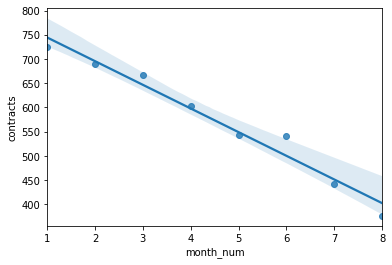

In [168]:
sns.regplot(contracts_evaluation_month['month_num'], contracts_evaluation_month['contracts'], scatter=True)


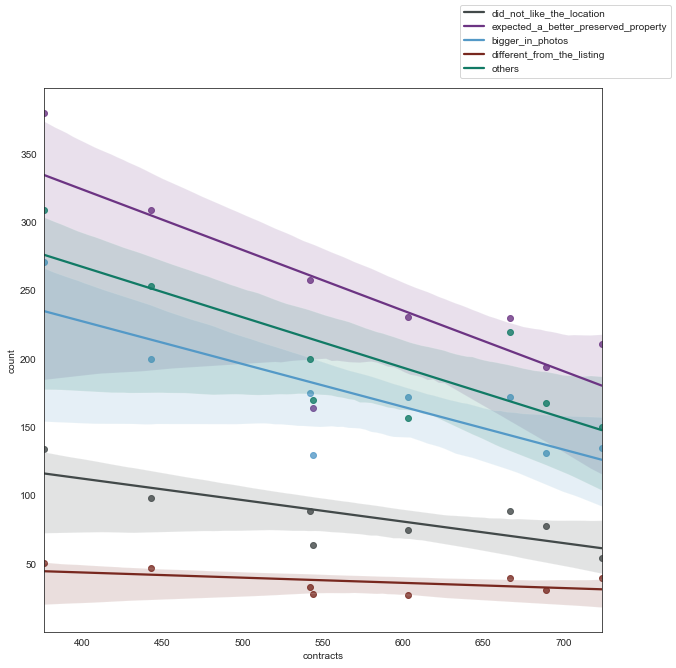

In [259]:
sns.set_style("white")
fig, ax = plt.subplots(figsize=(10,10))


sns.regplot(contracts_evaluation_month['contracts'], contracts_evaluation_month['did_not_like_the_location'], scatter=True, color='#424949')
sns.regplot(contracts_evaluation_month['contracts'], contracts_evaluation_month['expected_a_better_preserved_property'], scatter=True, color='#6C3483')
sns.regplot(contracts_evaluation_month['contracts'], contracts_evaluation_month['bigger_in_photos'], scatter=True, color='#5499C7')
sns.regplot(contracts_evaluation_month['contracts'], contracts_evaluation_month['different_from_the_listing'], scatter=True,color='#78281F' )
sns.regplot(contracts_evaluation_month['contracts'], contracts_evaluation_month['others'], scatter=True, color='#117A65')

fig.legend(labels=['did_not_like_the_location','expected_a_better_preserved_property','bigger_in_photos', 'different_from_the_listing', 'others'])

ax.set(xlabel='contracts', ylabel='count')


plt.show()

fig.savefig("interference_issues_contracts.png",transparent=True)

In [127]:
contracts_evaluation_month

,month,visits,tenant_that_visited,visited_houses,offers,tenants_that_made_offers,contracts,building,conservation,size,price,location,did_not_like_the_location,expected_a_better_preserved_property,bigger_in_photos,different_from_the_listing,others,month_num
0,jan,7130,4678,4140,3924,2977,724,238,282,285,208,369,54,211,135,40,150,1
1,fev,7132,5193,4322,3658,2461,689,251,308,311,210,392,78,194,131,31,168,2
2,mar,6933,5322,4299,3791,2526,667,330,432,445,291,560,89,230,172,40,220,3
3,abr,7342,5844,3150,2453,1699,603,271,336,344,232,442,75,231,172,27,157,4
4,mai,7238,6112,4006,3587,2645,544,240,323,317,215,375,64,164,130,28,170,5
5,jun,8377,6710,3250,3011,1583,542,367,464,451,307,588,89,258,175,33,200,6
6,jul,8130,7122,3993,3500,1801,443,403,513,507,358,635,98,309,200,47,253,7
7,ago,8288,7630,4155,3431,1857,376,576,749,719,522,904,134,380,271,51,309,8


In [136]:
tenant_reviews_clean.head()

,visit_date,day,time,house_id,neighbourhood,visitor,agent,review,building,conservation,size,price,location,did_not_like_the_location,expected_a_better_preserved_property,bigger_in_photos,different_from_the_listing,others,year_visit,month_visit
0,2018-08-25,2018-08-25,9:30,892816340,Bela Vista,Gustavo,Irineu,5,0,1,1,1,1,0,0,0,0,0,2018,08
1,2018-05-02,2018-05-02,16:30,892828253,Paraíso,Erica,Marcelo,5,0,1,1,1,1,0,0,0,0,0,2018,05
2,2018-08-08,2018-08-08,8:30,892836919,Vila Mazzei,Julio,Carlos,5,1,1,1,0,1,0,0,0,0,0,2018,08
3,2018-05-19,2018-05-19,12:15,892789680,Saúde,Carla,Mario,3,0,0,0,0,0,0,1,0,0,0,2018,05
4,2018-01-16,2018-01-16,14:45,892816141,Moema,Thâmara,Antonio,3,0,0,0,0,0,0,1,0,0,0,2018,01


In [145]:
type(tenant_reviews_clean['review'][1])

str

In [155]:
tenant_reviews_clean.groupby(['month_visit','review']).sum()

house_id  building  conservation  size  price  \
month_visit review                                                       
01          1.0       29462701825         0             0     0      0   
            2.0       42854699366         0             0     0      0   
            3.0      133028341088         0             0     0      0   
            4.0      158920126384         0             0     0      0   
            5.0      408013843114       238           281   284    206   
02          1.0       32141174288         0             0     0      0   
            2.0       58032634760         0             0     0      0   
            3.0      134814379297         0             0     0      0   
            4.0      158920334842         0             0     0      0   
            5.0      435692501109       251           308   311    210   
03          1.0       47319250150         0             0     0      0   
            2.0       70532187407         0             0     0      0   
            3.0      147313862786         0             0     0      0   
            4.0      211596735447         0             0     0      0   
            5.0      608006342741       330           432   445    291   
04          1.0       33034141119         0             0     0      0   
            2.0       81246303278         0             0     0      0   
            3.0      135707612268         0             0     0      0   
            4.0      182134730784         0             0     0      0   
            5.0      476763738282       271           335   343    231   
05          1.0       33034220824         0             0     0      0   
            2.0       43748058728         0             0     0      0   
            3.0       99995457132         0             0     0      0   
            4.0      180349752571         0             0     0      0   
            5.0      441052686088       240           323   316    214   
06          1.0       40176876640         0             0     0      0   
            2.0       61604267810         0             0     0      0   
            3.0      152672078531         0             0     0      0   
            4.0      230347587359         0             0     0      0   
            5.0      648189098688       367           461   448    303   
07          1.0       38391297011         0             0     0      0   
            2.0       80353913280         0             0     0      0   
            3.0      183029076566         0             0     0      0   
            4.0      277667214779         0             0     0      0   
            5.0      725866726066       403           513   506    357   
08          1.0       55355602983         0             0     0      0   
            2.0      100889170891         0             0     0      0   
            3.0      217850105784         0             0     0      0   
            4.0      346417200947         0             0     0      0   
            5.0     1038360952422       576           749   718    520   

                    location  did_not_like_the_location  \
month_visit review                                        
01          1.0            0                          4   
            2.0            0                          7   
            3.0            0                         16   
            4.0            0                         27   
            5.0          367                          0   
02          1.0            0                          7   
            2.0            0                         13   
            3.0            0                         34   
            4.0            0                         24   
            5.0          392                          0   
03          1.0            0                         15   
            2.0            0                         13   
            3.0            0                         25   
            4.0            0   

In [161]:
resume_visit_classification

,month_visit,building,conservation,size,price,location,did_not_like_the_location,expected_a_better_preserved_property,bigger_in_photos,different_from_the_listing,others
0,jan,238,282,285,208,369,54,211,135,40,150
1,fev,251,308,311,210,392,78,194,131,31,168
2,mar,330,432,445,291,560,89,230,172,40,220
3,abr,271,336,344,232,442,75,231,172,27,157
4,mai,240,323,317,215,375,64,164,130,28,170
5,jun,367,464,451,307,588,89,258,175,33,200
6,jul,403,513,507,358,635,98,309,200,47,253
7,ago,576,749,719,522,904,134,380,271,51,309


In [163]:
contracts_evaluation_month

,month,visits,tenant_that_visited,visited_houses,offers,tenants_that_made_offers,contracts,building,conservation,size,price,location,did_not_like_the_location,expected_a_better_preserved_property,bigger_in_photos,different_from_the_listing,others,month_num
0,jan,7130,4678,4140,3924,2977,724,238,282,285,208,369,54,211,135,40,150,1
1,fev,7132,5193,4322,3658,2461,689,251,308,311,210,392,78,194,131,31,168,2
2,mar,6933,5322,4299,3791,2526,667,330,432,445,291,560,89,230,172,40,220,3
3,abr,7342,5844,3150,2453,1699,603,271,336,344,232,442,75,231,172,27,157,4
4,mai,7238,6112,4006,3587,2645,544,240,323,317,215,375,64,164,130,28,170,5
5,jun,8377,6710,3250,3011,1583,542,367,464,451,307,588,89,258,175,33,200,6
6,jul,8130,7122,3993,3500,1801,443,403,513,507,358,635,98,309,200,47,253,7
7,ago,8288,7630,4155,3431,1857,376,576,749,719,522,904,134,380,271,51,309,8


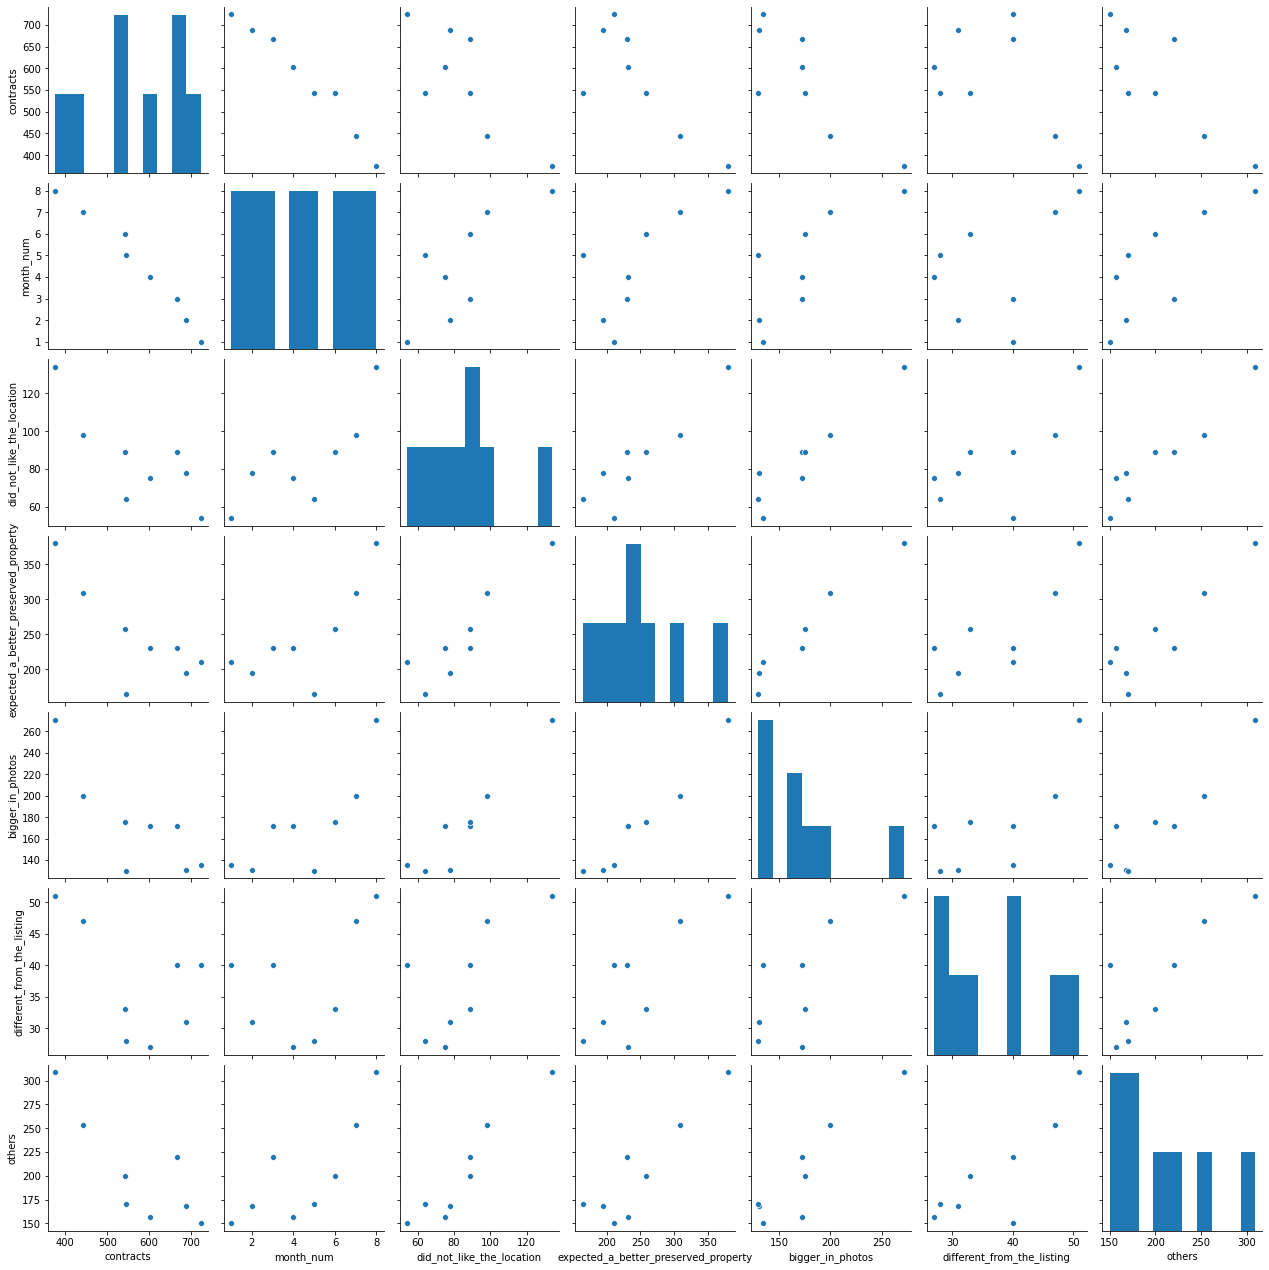

In [167]:
sns.pairplot(contracts_evaluation_month[['contracts','month_num','did_not_like_the_location','expected_a_better_preserved_property','bigger_in_photos','different_from_the_listing','others']])

## apartamentos que receberam review ruim

In [327]:
tenant_reviews_clean

,visit_date,day,time,house_id,neighbourhood,visitor,agent,review,building,conservation,size,price,location,did_not_like_the_location,expected_a_better_preserved_property,bigger_in_photos,different_from_the_listing,others,year_visit,month_visit
0,2018-08-25,2018-08-25,9:30,892816340,Bela Vista,Gustavo,Irineu,5.0,0,1,1,1,1,0,0,0,0,0,2018,08
1,2018-05-02,2018-05-02,16:30,892828253,Paraíso,Erica,Marcelo,5.0,0,1,1,1,1,0,0,0,0,0,2018,05
2,2018-08-08,2018-08-08,8:30,892836919,Vila Mazzei,Julio,Carlos,5.0,1,1,1,0,1,0,0,0,0,0,2018,08
3,2018-05-19,2018-05-19,12:15,892789680,Saúde,Carla,Mario,3.0,0,0,0,0,0,0,1,0,0,0,2018,05
4,2018-01-16,2018-01-16,14:45,892816141,Moema,Thâmara,Antonio,3.0,0,0,0,0,0,0,1,0,0,0,2018,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12756,2018-03-27,2018-03-27,8:00,892790664,Perdizes,Markus,Cindy,NaN,0,0,0,0,0,0,0,0,0,0,2018,03
12757,2018-06-28,2018-06-28,13:00,892791091,Liberdade,Hudson,Ricardo,NaN,0,0,0,0,0,0,0,0,0,0,2018,06
12758,2018-01-03,2018-01-03,15:00,892815463,Bela Vista,Lívia,Gisele,NaN,0,0,0,0,0,0,0,0,0,0,2018,01
12759,2018-01-27,2018-01-27,9:45,892810874,Consolação,Gabriela,Marcos,NaN,0,0,0,0,0,0,0,0,0,0,2018,01


In [328]:
tenant_reviews_clean.describe()

,house_id,review,building,conservation,size,price,location,did_not_like_the_location,expected_a_better_preserved_property,bigger_in_photos,different_from_the_listing,others
count,1.275700e+04,9611.000000,12757.000000,12757.000000,12757.000000,12757.000000,12757.000000,12757.000000,12757.000000,12757.000000,12757.000000,12757.000000
mean,8.928191e+08,4.183228,0.209767,0.267069,0.264874,0.183664,0.334326,0.053382,0.154974,0.108646,0.023281,0.127538
std,1.608236e+04,1.113363,0.407158,0.442446,0.441283,0.387225,0.471773,0.224804,0.361894,0.311207,0.150802,0.333588
min,8.927640e+08,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.928125e+08,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.928215e+08,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.928313e+08,5.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.928446e+08,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [339]:
a = tenant_reviews_clean.groupby('house_id').mean()
mask = a['review'] < 2
a.loc[mask,:]

,review,building,conservation,size,price,location,did_not_like_the_location,expected_a_better_preserved_property,bigger_in_photos,different_from_the_listing,others
house_id,,,,,,,,,,,
892767111,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.50,0.5,0.50,0.50
892782318,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.00,1.0,0.00,0.00
892783370,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.50,0.50
892784910,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00,0.0,1.00,1.00
892788040,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.50,0.0,0.50,0.50
...,...,...,...,...,...,...,...,...,...,...,...
892841394,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.20,0.4,0.20,0.40
892842069,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.25,0.25
892842405,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00,0.0,0.00,0.00


In [330]:
mask = tenant_reviews_clean['review'] < 3
tenant_reviews_clean.loc[mask,:]

,visit_date,day,time,house_id,neighbourhood,visitor,agent,review,building,conservation,size,price,location,did_not_like_the_location,expected_a_better_preserved_property,bigger_in_photos,different_from_the_listing,others,year_visit,month_visit
12,2018-08-14,2018-08-14,8:00,892790945,Saúde,Caroline,Ibiratan,1.0,0,0,0,0,0,0,0,1,0,0,2018,08
13,2018-06-07,6/7/2018,10:00,892830592,Santo Antônio,Marcio,Carla,2.0,0,0,0,0,0,0,1,0,0,1,2018,06
30,2018-07-12,2018-07-12,14:00,892835179,Swift,Marcos,Tiago,1.0,0,0,0,0,0,0,1,0,0,0,2018,07
42,2018-05-19,2018-05-19,12:00,892782041,Perdizes,Isabela,Marcia,2.0,0,0,0,0,0,0,1,1,0,0,2018,05
72,2018-07-11,7/11/2018,12:15,892824657,Centro,Vilma,Tiago,1.0,0,0,0,0,0,0,0,0,1,1,2018,07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9642,2018-04-09,4/9/2018,12:45,892824819,Jardim Paraíso,Daniella,Araci,2.0,0,0,0,0,0,0,1,0,1,1,2018,04
9644,2018-06-01,2018-06-01,12:45,892828577,Bela Vista,#VALUE!,Paulo,1.0,0,0,0,0,0,0,1,1,0,0,2018,06
9651,2018-06-20,2018-06-20,11:15,892828845,Bela Vista,Alexandre,Alessandro,2.0,0,0,0,0,0,0,1,0,0,0,2018,06
9656,2018-07-12,2018-07-12,14:30,892828299,Consolação,Viviane,Pedro,2.0,0,0,0,0,0,0,1,0,0,0,2018,07


# insights

## indice de contratos

In [61]:
visits_offers_contracts

,month,visits,tenant_that_visited,visited_houses,offers,tenants_that_made_offers,contracts,month_num
0,jan,7130,4678,4140,3924,2977,724,1
1,fev,7132,5193,4322,3658,2461,689,2
2,mar,6933,5322,4299,3791,2526,667,3
3,abr,7342,5844,3150,2453,1699,603,4
4,mai,7238,6112,4006,3587,2645,544,5
5,jun,8377,6710,3250,3011,1583,542,6
6,jul,8130,7122,3993,3500,1801,443,7
7,ago,8288,7630,4155,3431,1857,376,8


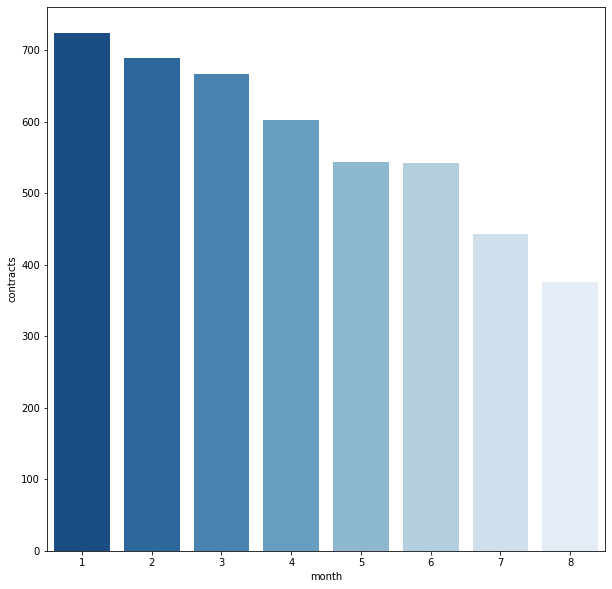

In [253]:
fig, ax = plt.subplots(figsize=(10,10))

sns.barplot(x=visits_offers_contracts['month_num'], y=visits_offers_contracts['contracts'], palette='Blues_r',ax=ax)


ax.set(xlabel='month', ylabel='contracts')


plt.show()


fig.savefig("barplot_month_contract.png",transparent=True)


### regressão linear para ver os coeficientes com relação ao rating

In [216]:
mask = tenant_reviews_clean['review'] == tenant_reviews_clean['review']
tenant_reviews_reg = tenant_reviews_clean.loc[mask,:]

In [217]:
tenant_reviews_reg

,visit_date,day,time,house_id,neighbourhood,visitor,agent,review,building,conservation,size,price,location,did_not_like_the_location,expected_a_better_preserved_property,bigger_in_photos,different_from_the_listing,others,year_visit,month_visit
0,2018-08-25,2018-08-25,9:30,892816340,Bela Vista,Gustavo,Irineu,5.0,0,1,1,1,1,0,0,0,0,0,2018,08
1,2018-05-02,2018-05-02,16:30,892828253,Paraíso,Erica,Marcelo,5.0,0,1,1,1,1,0,0,0,0,0,2018,05
2,2018-08-08,2018-08-08,8:30,892836919,Vila Mazzei,Julio,Carlos,5.0,1,1,1,0,1,0,0,0,0,0,2018,08
3,2018-05-19,2018-05-19,12:15,892789680,Saúde,Carla,Mario,3.0,0,0,0,0,0,0,1,0,0,0,2018,05
4,2018-01-16,2018-01-16,14:45,892816141,Moema,Thâmara,Antonio,3.0,0,0,0,0,0,0,1,0,0,0,2018,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9680,2018-06-01,2018-06-01,8:15,892825494,Brooklin Paulista,Lina,Pablo,3.0,0,0,0,0,0,0,1,0,0,0,2018,06
9681,2018-03-14,2018-03-14,16:30,892818606,Cidade Monções,Jose,Pablo,5.0,0,1,1,1,1,0,0,0,0,0,2018,03
9682,2018-04-14,2018-04-14,13:30,892822650,Vila Anglo Brasileira,Fernanda,Carlos,3.0,0,0,0,0,0,1,0,0,0,0,2018,04
9683,2018-08-28,2018-08-28,10:00,892824853,Leblon,Ana,Rosemary,5.0,0,0,0,0,1,0,0,0,0,0,2018,08


In [227]:
def rmse_modelo(modelo, prediction,X_train, y_test, y_train):
    treino = np.sqrt(mean_squared_error(y_train, modelo.predict(X_train)))
    teste = np.sqrt(mean_squared_error(y_test, prediction))
    score_modelo = modelo.score(X_test, y_test)
    print('Erro treino: ', treino)
    print('Erro teste: ', teste)
    print('Score: ', score_modelo)

In [224]:
X = tenant_reviews_reg[['conservation','size','location','did_not_like_the_location','expected_a_better_preserved_property','bigger_in_photos','different_from_the_listing','others']]
y = tenant_reviews_reg['review']
X_train, X_test, y_train, y_test = train_test_split(X, y)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [228]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
predictions_linear = linear_reg.predict(X_test)
rmse_modelo(linear_reg, predictions_linear, X_train,y_test,y_train )

Erro treino:  0.6630737015414284
Erro teste:  0.6504309605150477
Score:  0.6498799723215675


In [231]:
linear_reg.coef_

array([ 0.10997638,  0.07877696,  0.21788038, -0.20399464, -0.41267697,
       -0.19683045, -0.1065291 , -0.23649698])

In [238]:
X.columns

Index(['conservation', 'size', 'location', 'did_not_like_the_location',
       'expected_a_better_preserved_property', 'bigger_in_photos',
       'different_from_the_listing', 'others'],
      dtype='object')

In [260]:
pd.DataFrame( {'variable': X.columns,'coefficient':linear_reg.coef_}).sort_values('coefficient')

,variable,coefficient
4,expected_a_better_preserved_property,-0.412677
7,others,-0.236497
3,did_not_like_the_location,-0.203995
5,bigger_in_photos,-0.196830
6,different_from_the_listing,-0.106529
1,size,0.078777
0,conservation,0.109976
2,location,0.217880


## priorizar contratos em áreas melhores avaliadas

In [176]:
tenant_reviews_clean

,visit_date,day,time,house_id,neighbourhood,visitor,agent,review,building,conservation,size,price,location,did_not_like_the_location,expected_a_better_preserved_property,bigger_in_photos,different_from_the_listing,others,year_visit,month_visit
0,2018-08-25,2018-08-25,9:30,892816340,Bela Vista,Gustavo,Irineu,5.0,0,1,1,1,1,0,0,0,0,0,2018,08
1,2018-05-02,2018-05-02,16:30,892828253,Paraíso,Erica,Marcelo,5.0,0,1,1,1,1,0,0,0,0,0,2018,05
2,2018-08-08,2018-08-08,8:30,892836919,Vila Mazzei,Julio,Carlos,5.0,1,1,1,0,1,0,0,0,0,0,2018,08
3,2018-05-19,2018-05-19,12:15,892789680,Saúde,Carla,Mario,3.0,0,0,0,0,0,0,1,0,0,0,2018,05
4,2018-01-16,2018-01-16,14:45,892816141,Moema,Thâmara,Antonio,3.0,0,0,0,0,0,0,1,0,0,0,2018,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12756,2018-03-27,2018-03-27,8:00,892790664,Perdizes,Markus,Cindy,NaN,0,0,0,0,0,0,0,0,0,0,2018,03
12757,2018-06-28,2018-06-28,13:00,892791091,Liberdade,Hudson,Ricardo,NaN,0,0,0,0,0,0,0,0,0,0,2018,06
12758,2018-01-03,2018-01-03,15:00,892815463,Bela Vista,Lívia,Gisele,NaN,0,0,0,0,0,0,0,0,0,0,2018,01
12759,2018-01-27,2018-01-27,9:45,892810874,Consolação,Gabriela,Marcos,NaN,0,0,0,0,0,0,0,0,0,0,2018,01


In [175]:
top10_neighbourhood

,neighbourhood,visit_month,visits,houses_visited,good_reviews,bad_reviews
0,Perdizes,2017-12-01 00:00:00,1,1,0,0
1,Brooklin Paulista,2018-01-01 00:00:00,17,14,32,3
2,Jardim Paulista,2018-01-01 00:00:00,28,19,40,12
3,Centro,2018-01-01 00:00:00,30,25,49,14
4,Santa Cecília,2018-01-01 00:00:00,35,18,59,8
...,...,...,...,...,...,...
75,Bela Vista,2018-08-01 00:00:00,139,68,235,51
76,Copacabana,2018-08-01 00:00:00,58,46,97,19
77,Perdizes,2018-08-01 00:00:00,25,21,32,10
78,Brooklin Paulista,2018-08-01 00:00:00,45,29,86,6


In [177]:
top10_neighbourhood.groupby('neighbourhood').mean().sort_values('good_reviews', ascending=False)

,visits,houses_visited,good_reviews,bad_reviews
neighbourhood,,,,
Bela Vista,102.375000,60.750000,165.375000,36.875000
Vila Mariana,52.250000,33.250000,88.875000,14.625000
Centro,47.250000,38.000000,81.875000,15.625000
Consolação,44.625000,28.750000,70.375000,13.250000
Pinheiros,36.000000,25.375000,55.500000,9.375000
Brooklin Paulista,27.750000,19.250000,47.500000,5.875000
Copacabana,29.428571,23.428571,46.142857,9.000000
Jardim Paulista,32.125000,23.500000,45.750000,11.375000
Perdizes,33.888889,25.333333,41.777778,12.888889


In [178]:
bairros = tenant_reviews_clean.groupby('neighbourhood').count()


In [179]:
mask = bairros['visit_date'] > 120
bairros_count = bairros.loc[mask,:].reset_index()

In [180]:
bairros_count['quantity'] = bairros_count['visit_date']
bairros_count[['neighbourhood','quantity']]

,neighbourhood,quantity
0,Aclimação,211
1,Barra Funda,162
2,Barra da Tijuca,124
3,Bela Vista,1113
4,Botafogo,251
5,Brooklin Paulista,309
6,Cambuí,162
7,Campo Belo,226
8,Campos Elíseos,146
9,Centro,478


In [181]:
bairros_classificados = bairros_count['neighbourhood'].unique()

In [182]:
mask = tenant_reviews_clean['neighbourhood'].isin(bairros_classificados)
best_review_areas = tenant_reviews_clean.loc[mask,:]

In [187]:
bairros_count

,neighbourhood,visit_date,day,time,house_id,visitor,agent,review,building,conservation,...,price,location,did_not_like_the_location,expected_a_better_preserved_property,bigger_in_photos,different_from_the_listing,others,year_visit,month_visit,quantity
0,Aclimação,211,211,211,211,211,211,160,211,211,...,211,211,211,211,211,211,211,211,211,211
1,Barra Funda,162,162,162,162,162,162,117,162,162,...,162,162,162,162,162,162,162,162,162,162
2,Barra da Tijuca,124,124,124,124,124,124,107,124,124,...,124,124,124,124,124,124,124,124,124,124
3,Bela Vista,1113,1113,1113,1113,1113,1113,812,1113,1113,...,1113,1113,1113,1113,1113,1113,1113,1113,1113,1113
4,Botafogo,251,251,251,251,251,251,205,251,251,...,251,251,251,251,251,251,251,251,251,251
5,Brooklin Paulista,309,309,309,309,309,309,221,309,309,...,309,309,309,309,309,309,309,309,309,309
6,Cambuí,162,162,162,162,162,162,119,162,162,...,162,162,162,162,162,162,162,162,162,162
7,Campo Belo,226,226,226,226,226,226,154,226,226,...,226,226,226,226,226,226,226,226,226,226
8,Campos Elíseos,146,146,146,146,146,146,109,146,146,...,146,146,146,146,146,146,146,146,146,146
9,Centro,478,478,478,478,478,478,378,478,478,...,478,478,478,478,478,478,478,478,478,478


In [183]:
best_review_areas_mean = best_review_areas.groupby('neighbourhood').mean()[['review']].sort_values('review', ascending=False)

In [265]:
best_review_sum = best_review_areas.groupby('neighbourhood').sum().sort_values('location', ascending=False)[['building','conservation','size','price','location','did_not_like_the_location']]
best_review_sum

,building,conservation,size,price,location,did_not_like_the_location
neighbourhood,,,,,,
Bela Vista,206,273,260,235,349,105
Vila Mariana,122,157,146,85,201,25
Centro,111,126,137,101,180,29
Consolação,90,113,107,81,172,18
Pinheiros,80,86,89,57,132,10
Jardim Paulista,42,81,79,55,109,15
Botafogo,62,77,89,52,106,18
Perdizes,63,80,79,49,105,19
Brooklin Paulista,71,80,82,46,101,11


In [190]:
best_review_areas_mean

,review
neighbourhood,
Barra Funda,4.444444
Paraíso,4.382114
Botafogo,4.356098
Saúde,4.355556
Cerqueira César,4.314607
Campo Belo,4.305195
Brooklin Paulista,4.298643
Liberdade,4.281553
Indianópolis,4.276471


In [267]:
 df_review_neightb = pd.merge(best_review_sum, best_review_areas_mean, left_on=['neighbourhood'], right_on=['neighbourhood'])

In [271]:
df_review_neightb = df_review_neightb[['review','building','conservation','size','price','location','did_not_like_the_location']]

In [272]:
df_review_neightb

,review,building,conservation,size,price,location,did_not_like_the_location
neighbourhood,,,,,,,
Bela Vista,4.092365,206,273,260,235,349,105
Vila Mariana,4.238554,122,157,146,85,201,25
Centro,4.076720,111,126,137,101,180,29
Consolação,4.196629,90,113,107,81,172,18
Pinheiros,4.222222,80,86,89,57,132,10
Jardim Paulista,4.079051,42,81,79,55,109,15
Botafogo,4.356098,62,77,89,52,106,18
Perdizes,3.986842,63,80,79,49,105,19
Brooklin Paulista,4.298643,71,80,82,46,101,11


In [273]:
def rond_row(row):
    return round(row,2)

In [275]:
df_review_neightb['review'] = df_review_neightb['review'].apply(rond_row)

In [276]:
df_review_neightb

,review,building,conservation,size,price,location,did_not_like_the_location
neighbourhood,,,,,,,
Bela Vista,4.09,206,273,260,235,349,105
Vila Mariana,4.24,122,157,146,85,201,25
Centro,4.08,111,126,137,101,180,29
Consolação,4.20,90,113,107,81,172,18
Pinheiros,4.22,80,86,89,57,132,10
Jardim Paulista,4.08,42,81,79,55,109,15
Botafogo,4.36,62,77,89,52,106,18
Perdizes,3.99,63,80,79,49,105,19
Brooklin Paulista,4.30,71,80,82,46,101,11


## horário da visita

In [145]:
time_quantity = tenant_reviews_clean[['time','review']].groupby('time').count()

In [146]:
time_review = round(tenant_reviews_clean[['time','review']].groupby('time').mean(),2)

In [147]:
df_time_rating = pd.merge(time_quantity, time_review, left_on=['time'], right_on=['time']).rename(columns={'review_x':'number_of_ratings','review_y':'rating'})

In [148]:
df_time_rating.sort_values('rating', ascending=False)

,number_of_ratings,rating
time,,
18:00,2,5.00
18:30,1,5.00
17:15,6,4.83
8:15,66,4.53
17:45,4,4.50
17:30,6,4.33
16:15,73,4.33
16:00,125,4.33
16:45,38,4.32


In [151]:
mask = df_time_rating['number_of_ratings'] > 30
df_time_rating = df_time_rating.loc[mask,:].sort_values('rating', ascending=False)

In [154]:
df_time_rating.reset_index(inplace=True)

In [155]:
df_time_rating

,time,number_of_ratings,rating
0,8:15,66,4.53
1,16:15,73,4.33
2,16:00,125,4.33
3,16:45,38,4.32
4,9:15,165,4.32
5,8:30,101,4.27
6,9:00,630,4.27
7,13:45,178,4.25
8,8:00,579,4.25
9,8:45,243,4.25


In [ ]:
sns.lineplot(x='month_num', y='contracts',data=visits_offers_contracts,marker='o', markersize=10)


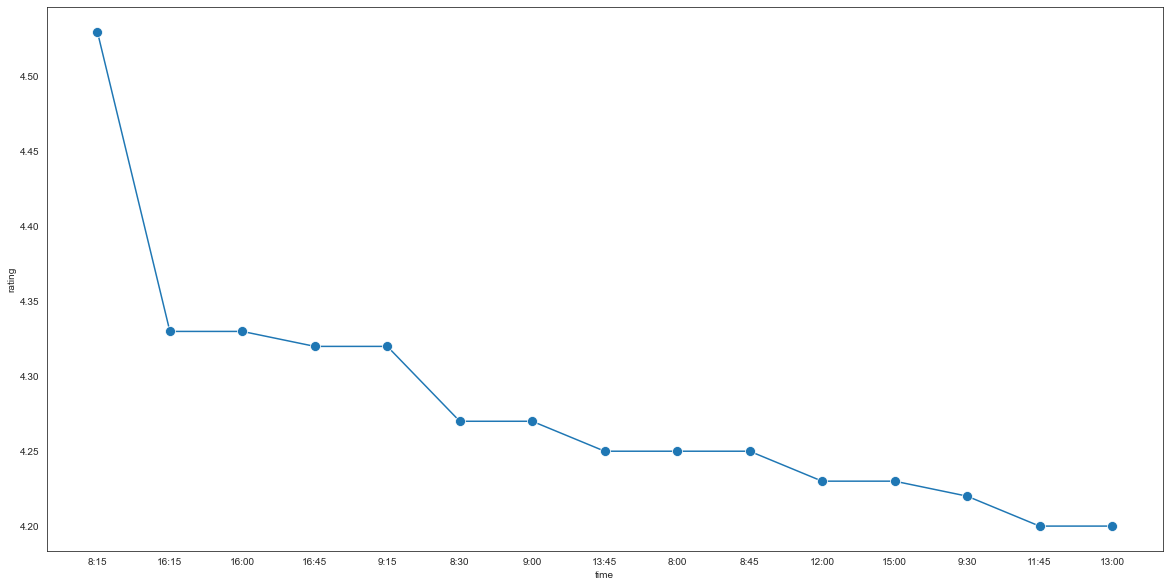

In [261]:
fig, ax = plt.subplots(figsize=(20,10))

sns.lineplot(x=df_time_rating['time'].head(15), y=df_time_rating['rating'].head(15),marker='o', markersize=10, sort=False)

plt.show()


fig.savefig("best_hour.png",transparent=True)

##  aproximação inquilino - quinto andar

In [195]:
visits_contracts['total_sigs_and_not_sign'] = visits_contracts['tenants_that_did_not_sign'] + visits_contracts['tenants_that_signed']

In [196]:
visits_contracts['percentage_signed'] = round((visits_contracts['tenants_that_signed'] / visits_contracts['total_sigs_and_not_sign'])*100,2)

In [197]:
visits_contracts

,visits,tenants_that_did_not_sign,tenants_that_signed,total_sigs_and_not_sign,percentage_signed
0,1,5091,148,5239,2.82
1,2,2199,124,2323,5.34
2,3,1176,108,1284,8.41
3,4,510,64,574,11.15
4,5,396,84,480,17.50
5,6,384,64,448,14.29
6,7,261,32,293,10.92
7,8,216,20,236,8.47
8,9,210,12,222,5.41
9,10,132,4,136,2.94


In [ ]:
#fazer com que os inquilinos que visitam apenas uma vez, visitem mais vezes até chegar na faixa de 4 a 7 visitas, faixa onde se tem mais contratos assinados.


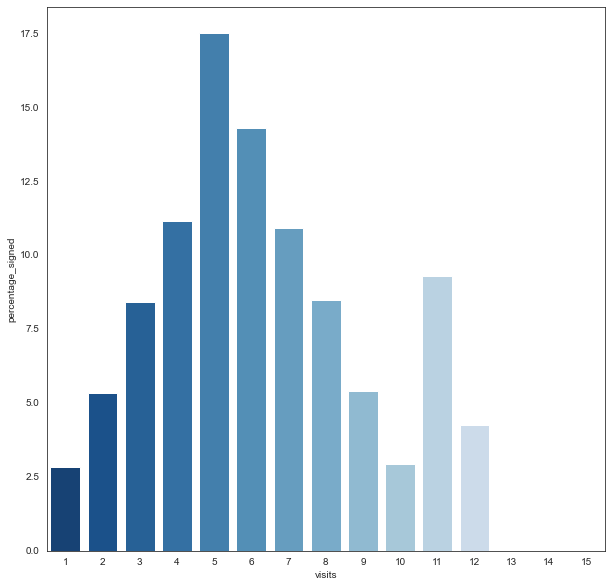

In [277]:
fig, ax = plt.subplots(figsize=(10,10))


sns.barplot(x=visits_contracts['visits'], y=visits_contracts['percentage_signed'], palette='Blues_r',ax=ax)

plt.show()


fig.savefig("aprox_signed.png",transparent=True)

<AxesSubplot:xlabel='visits', ylabel='total_sigs_and_not_sign'>

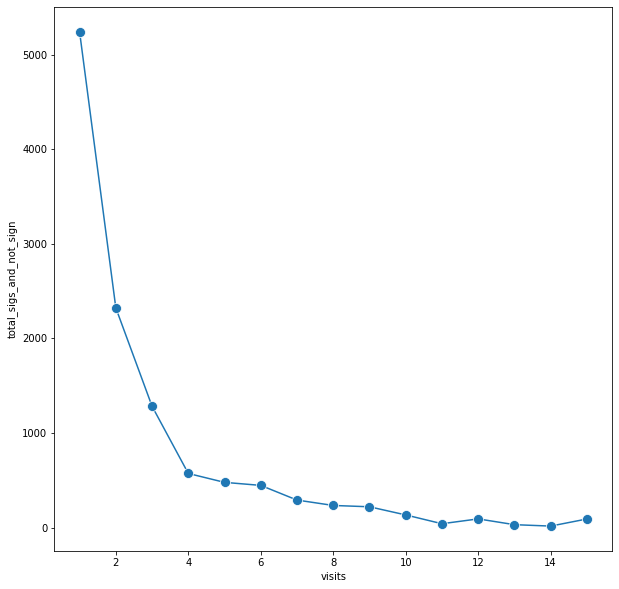

In [210]:
fig, ax = plt.subplots(figsize=(10,10))
sns.lineplot(x=visits_contracts['visits'], y=visits_contracts['total_sigs_and_not_sign'] ,marker='o', markersize=10)
